<a href="https://colab.research.google.com/github/emeyer121/quant_neuro_hw/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

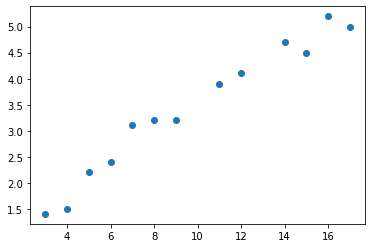

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Q1
age = np.array([3,4,5,6,7,8,9,11,12,14,15,16,17]).reshape(-1,1)
wing_length = np.array([1.4,1.5,2.2,2.4,3.1,3.2,3.2,3.9,4.1,4.7,4.5,5.2,5.0]).reshape(-1,1)

plt.scatter(age,wing_length,)
plt.show()

[[1.62367672]
 [1.88836084]
 [2.15304496]
 [2.41772908]
 [2.6824132 ]
 [2.94709732]
 [3.21178145]
 [3.74114969]
 [4.00583381]
 [4.53520205]
 [4.79988617]
 [5.06457029]
 [5.32925441]]


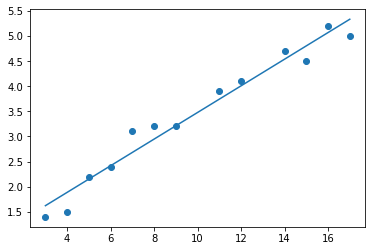

In [25]:
# Q2
reg = LinearRegression().fit(age, wing_length)
reg.coef_
reg.intercept_

Y = age*reg.coef_ + reg.intercept_
print(Y)

plt.plot(age,Y)
plt.scatter(age,wing_length,)
plt.show()

In [31]:
# Q3

#add constant to predictor variables
x = sm.add_constant(age)

#fit linear regression model
model = sm.OLS(wing_length, x).fit()

#view model summary
print(model.summary())

print('We reject H_0')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     289.4
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           3.01e-09
Time:                        01:08:38   Log-Likelihood:                0.36312
No. Observations:                  13   AIC:                             3.274
Df Residuals:                      11   BIC:                             4.404
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8296      0.168      4.946      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


0.1308838805847633


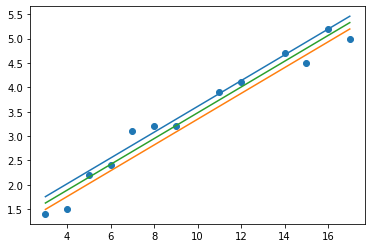

In [35]:
# Q4
t = 17.012
MSE = 0.016
ci = t*np.sqrt(MSE / np.sum((age - np.mean(age))**2))
print(ci)

plt.plot(age,Y+ci)
plt.plot(age,Y-ci)
plt.plot(age,Y)
plt.scatter(age,wing_length,)
plt.show()

In [36]:
# Q5
print('r2 = 0.963')

r2 = 0.963


In [39]:
# Q6
from numpy import cov
from numpy.random import seed
seed(1)
from scipy.stats import pearsonr
age = [3,4,5,6,7,8,9,11,12,14,15,16,17]
wing_length = [1.4,1.5,2.2,2.4,3.1,3.2,3.2,3.9,4.1,4.7,4.5,5.2,5.0]

covariance = cov(age, wing_length)
print(covariance)
corr, _ = pearsonr(age, wing_length)
print('Pearsons correlation: %.3f' % corr)

[[22.52564103  5.96217949]
 [ 5.96217949  1.63807692]]
Pearsons correlation: 0.982


[[0.27017267]]
[0.78542236]


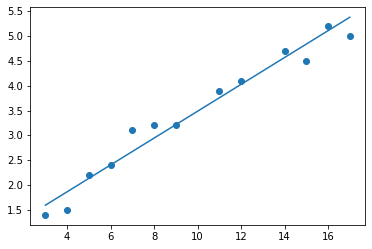

In [48]:
noise = np.random.normal(0,0.1,13)
age = np.array(age).reshape(-1,1)
new_wing_length = np.array(wing_length + noise).reshape(-1,1)

reg = LinearRegression().fit(age, new_wing_length)
print(reg.coef_)
print(reg.intercept_)

Y = age*reg.coef_ + reg.intercept_

plt.plot(age,Y)
plt.scatter(age,wing_length)
plt.show()